In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('insurance.csv')

# View first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# View data types
df.dtypes

# Check unique values in categorical columns
print("Sex:", df['sex'].unique())
print("Smoker:", df['smoker'].unique())
print("Region:", df['region'].unique())


Sex: ['female' 'male']
Smoker: ['yes' 'no']
Region: ['southwest' 'southeast' 'northwest' 'northeast']


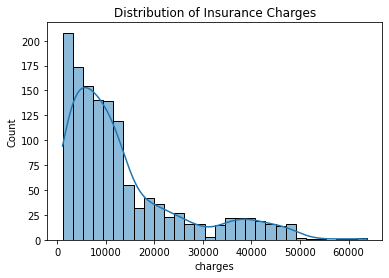

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.show()


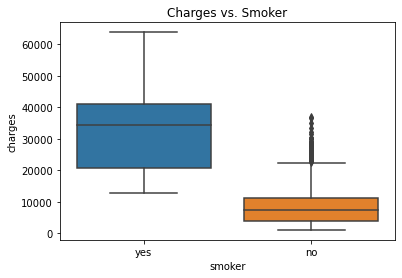

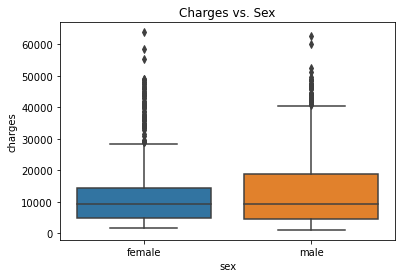

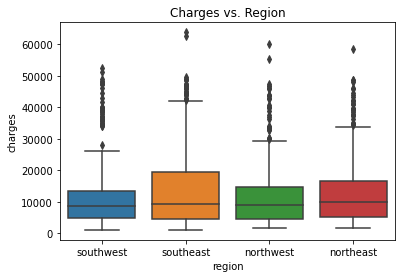

In [9]:
# Charges by Smoking Status
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges vs. Smoker')
plt.show()

# Charges by Sex
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges vs. Sex')
plt.show()

# Charges by Region
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges vs. Region')
plt.show()


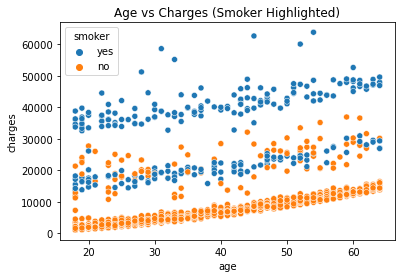

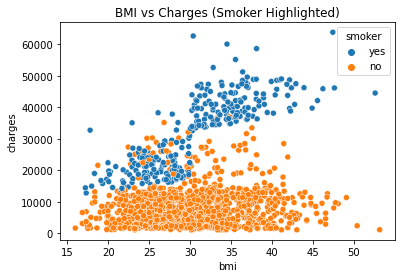

In [10]:
# Age vs Charges
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs Charges (Smoker Highlighted)')
plt.show()

# BMI vs Charges
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs Charges (Smoker Highlighted)')
plt.show()


In [12]:
corr = df.corr()


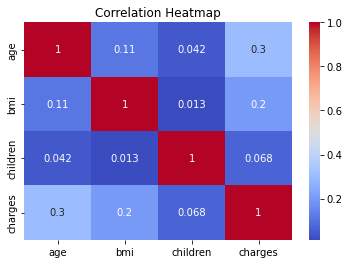

In [13]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [15]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 4181.1944737536505
MSE: 33596915.851361446
RMSE: 5796.284659276272
R² Score: 0.7835929767120724


In [17]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df)


            Feature   Coefficient
4        smoker_yes  23651.128856
7  region_southwest   -809.799354
6  region_southeast   -657.864297
2          children    425.278784
5  region_northwest   -370.677326
1               bmi    337.092552
0               age    256.975706
3          sex_male    -18.591692


In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_preds = rf_model.predict(X_test)


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Random Forest MAE:", mean_absolute_error(y_test, rf_preds))
print("Random Forest RMSE:", mean_squared_error(y_test, rf_preds, squared=False))
print("Random Forest R² Score:", r2_score(y_test, rf_preds))


Random Forest MAE: 2550.0784706115096
Random Forest RMSE: 4576.299916157115
Random Forest R² Score: 0.8651034329144947


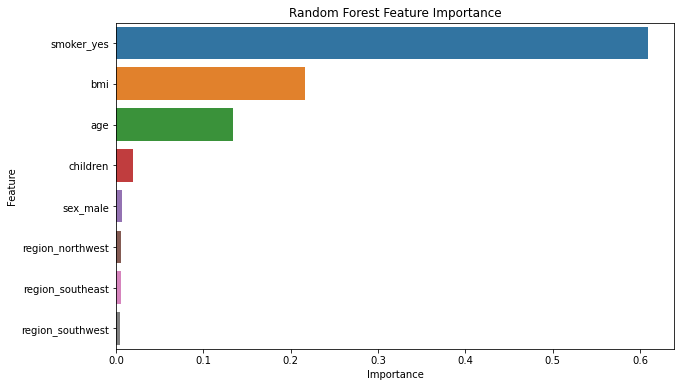

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importance')
plt.show()
